In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_set = pd.read_csv('clean_data.csv', header=0)
data_set

,Married,Years_Together,First_Together,Religious_Attendance,Interracial_Couple,Age_Diff,Age,P_Age,Education,P_Education,Gender,Household_Income,Ethnicity,P_Ethnicity,Politics,P_Politics,White,Black or African American,American Indian or Alaska Native,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Hawaiian,Guamanian,Samoan,Other Pacific Islander,Some other race,school,college,mil,church,vol_org,customer,restaurant,party,other,dating,soc_network,game,chat,org,public,blind_date,vacation,serve_nonint,trip,neighbors,met_online
0,"Yes, I am Married",34,1983,Never,no,3,55,52,Bachelor's degree or higher,Masters degree,Female,"$150,000 to $174,999","White, Non-Hispanic",White,Not Strong Republican,Leans Republican,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,"Yes, I am Married",11,2006,Once or twice a month,no,2,47,45,Bachelor's degree or higher,Associate degree,Male,"$200,000 to $249,999","White, Non-Hispanic",White,Leans Democrat,Leans Democrat,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes
2,"Yes, I am Married",34,1983,Once a year or less,no,0,59,59,Bachelor's degree or higher,Bachelors degree,Female,"$175,000 to $199,999","White, Non-Hispanic",White,Strong Democrat,Strong Democrat,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
3,"Yes, I am Married",36,1981,Once a week,no,1,59,60,High school,Bachelors degree,Male,"$75,000 to $84,999","White, Non-Hispanic",White,Strong Democrat,Undecided/Independent/Other,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no
4,"Yes, I am Married",51,1966,Once a week,no,1,66,67,High school,"Some college, no degree",Female,"$50,000 to $59,999","White, Non-Hispanic",White,Not Strong Democrat,Leans Republican,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,"Yes, I am Married",2,2015,Never,no,2,27,29,Bachelor's degree or higher,Bachelors degree,Female,"$60,000 to $74,999","White, Non-Hispanic",White,Strong Democrat,Leans Democrat,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes
2924,"No, I am not Married",1,2016,A few times a year,no,3,24,21,Bachelor's degree or higher,Bachelors degree,Male,"$250,000 or more","White, Non-Hispanic",White,Not Strong Republican,Leans Republican,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes
2925,"Yes, I am Married",5,2012,A few times a year,yes,2,41,39,Bachelor's degree or higher,Bachelors degree,Male,"$125,000 to $149,999","White, Non-Hispanic",Black or African American,Not Strong Democrat,Leans Democrat,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes
2926,"No, I am not Married",3,2014,Once a year or less,yes,4,32,28,Bachelor's degree or higher,Masters degree,Male,"$60,000 to $74,999","White, Non-Hispanic",Asian or Pacific Islander,Leans Democrat,Leans Democrat,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes


In [27]:
#split data set into in sample and out-of-sample (OOS) data,
#so that a machine learning model can be built, and we can use the model to classify OOS data
oos_size = int(0.10*data_set.shape[0])
ins_size = data_set.shape[0] - oos_size
data = data_set[:ins_size]
oos_data = data_set[ins_size:]

In [28]:
data.describe(include=[np.number])

,Years_Together,First_Together,Age_Diff,Age,P_Age
count,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000
mean,23.977997,1993.022003,4.235964,50.417299,50.140364
std,17.033584,17.033584,4.892516,16.285533,16.319789
min,0.000000,1939.000000,0.000000,18.000000,10.000000
25%,10.000000,1980.000000,1.000000,37.000000,36.000000
50%,21.000000,1996.000000,3.000000,52.000000,51.000000
75%,37.000000,2007.000000,6.000000,63.000000,63.000000
max,78.000000,2017.000000,45.000000,93.000000,95.000000


In [29]:
pd.set_option('display.max_columns', None)
data.describe(include=['O'])

,Married,Religious_Attendance,Interracial_Couple,Education,P_Education,Gender,Household_Income,Ethnicity,P_Ethnicity,Politics,P_Politics,White,Black or African American,American Indian or Alaska Native,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Hawaiian,Guamanian,Samoan,Other Pacific Islander,Some other race,school,college,mil,church,vol_org,customer,restaurant,party,other,dating,soc_network,game,chat,org,public,blind_date,vacation,serve_nonint,trip,neighbors,met_online
count,2636,2636,2617,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2636
unique,2,7,2,4,15,2,21,5,6,7,8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,"Yes, I am Married",Never,no,Bachelor's degree or higher,HS graduate or GED,Female,"$100,000 to $124,999","White, Non-Hispanic",White,Strong Democrat,Undecided/Independent/Other,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
freq,1857,736,2214,991,611,1320,358,1942,2119,503,757,2220,2391,2538,2614,2590,2615,2617,2623,2626,2619,2622,2629,2629,2627,2575,2296,2367,2519,2420,2430,2418,2060,2327,2503,2439,2547,2571,2552,2574,2488,2485,2543,2556,2574,2545,2351


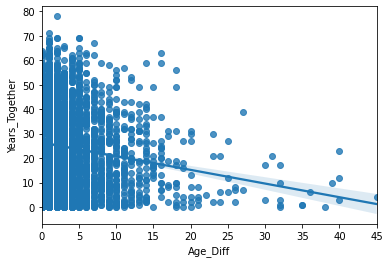

In [34]:
sns.regplot(y=data['Years_Together'], x=data['Age_Diff'])
plt.show()

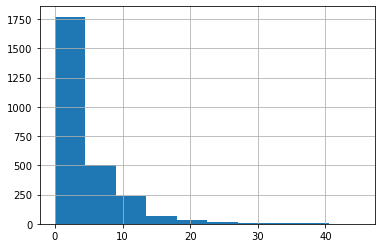

In [35]:
data.Age_Diff.hist()
plt.show()

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

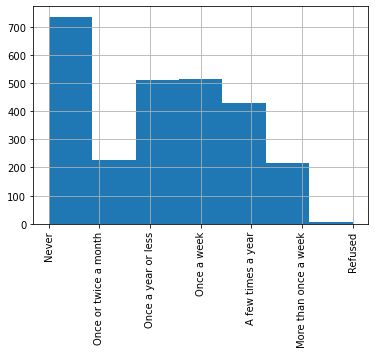

In [44]:
data.Religious_Attendance.hist(bins=7)
plt.xticks(rotation='vertical')